Start by importing the necessary libraries

In [18]:
import pandas as pd
import numpy as np

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Predictive Modeling
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Model Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score

ModuleNotFoundError: No module named 'imblearn'

### Cleaning and Preprocessing

In [6]:
# import data and display head
df = pd.read_csv('data/telecom_data')

display(df.head())
display(df.describe())
display(df.columns)
display(pd.isna(df).sum())

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

1) Attributes are not on the same scale, this may be a problem for models like K Nearest Neighbors, I can fix this by utilizing a StandardScaler or a MinMaxScaler
2) There are no missing values
3) My column names have spaces instead of '_' which may make it more difficult to call back to them later
4) A few of my columns look like they may have a dtype object. I can check this by using the dtypes method

In [7]:
# replace whitespace in column names with _
dwb_col = df.columns.str.replace('\s+', '_') 

# change old column names to new column names without whitespace
df.columns = dwb_col

# double check changes
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [8]:
df.dtypes

state                      object
account_length              int64
area_code                   int64
phone_number               object
international_plan         object
voice_mail_plan            object
number_vmail_messages       int64
total_day_minutes         float64
total_day_calls             int64
total_day_charge          float64
total_eve_minutes         float64
total_eve_calls             int64
total_eve_charge          float64
total_night_minutes       float64
total_night_calls           int64
total_night_charge        float64
total_intl_minutes        float64
total_intl_calls            int64
total_intl_charge         float64
customer_service_calls      int64
churn                        bool
dtype: object

In [9]:
# find out what attributes have the highest correlation with churn
corr_matrix = df.corr()
corr_matrix['churn'].sort_values(ascending=False)

churn                     1.000000
customer_service_calls    0.208750
total_day_minutes         0.205151
total_day_charge          0.205151
total_eve_minutes         0.092796
total_eve_charge          0.092786
total_intl_charge         0.068259
total_intl_minutes        0.068239
total_night_charge        0.035496
total_night_minutes       0.035493
total_day_calls           0.018459
account_length            0.016541
total_eve_calls           0.009233
area_code                 0.006174
total_night_calls         0.006141
total_intl_calls         -0.052844
number_vmail_messages    -0.089728
Name: churn, dtype: float64

The pearson correlation coefficient only measures linear correlations, it may completely miss out on nonlinear relationships. Even though our correlations seem low, we should not rule them out entirely. 

In [10]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

There appears to be some class imbalance in our target variable. I may want to address this using SMOTE to ensure that the minority class is well accounted for

In [11]:
df = df.drop(columns='phone_number')

In [116]:
# ohe = OneHotEncoder()
# ohe.fit(df[cat_attribs])
# df.drop(columns= cat_attribs)
# pd.concat([df, ohe], ignore_index=True)

# dummies = pd.get_dummies(df[cat_attribs])
# res = pd.concat([df, dummies], axis=1)
# res = res.drop(cat_attribs, axis=1)
# res

In [59]:
# res.columns

In [61]:
# df.replace({False: 0, True: 1}, inplace=True)
# df.replace({'no': 0, 'yes': 1}, inplace=True)
# df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [15]:
X = df.drop(columns='churn')
y = df.churn

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [16]:
cat_attribs = list(df.select_dtypes(include=['object']).columns)
num_attribs = list(df.select_dtypes(exclude=['object']).columns)

preprocessing = ColumnTransformer([
    ('num', StandardScaler(), num_attribs),
    ('cat', OneHotEncoder(categories="auto", handle_unknown="ignore"), cat_attribs),
], remainder="passthrough")

def model_pipeline(model):
    pipe_model = imbpipeline(steps=[
        ('preprocess', preprocess),
        ('smote', SMOTE()),
        ('model', model),
])
    pipeline.fit(X_train, y_train)
    pipeline.score(X_train_y_train)
    
def evaluate_model(model, y):
    y_pred = model.predict(y)
    print(classification_report(y, y_pred))
    plot_confusion_matrix(model, X, y,cmap="Blues")

In [17]:
model_pipeline(LogisticRegression)

NameError: name 'imbpipeline' is not defined

In [48]:
cv_results = cross_validate(
                    estimator = pipe,
                    X = X_train,
                    y = y_train,
                    cv = 5,
                    return_train_score = True
)
cv_results

{'fit_time': array([0.07888198, 0.03519201, 0.02688885, 0.02578998, 0.02675509]),
 'score_time': array([0.00702214, 0.00335002, 0.0033412 , 0.00356102, 0.00333309]),
 'test_score': array([0.854     , 0.87      , 0.862     , 0.85      , 0.85170341]),
 'train_score': array([0.87743872, 0.86943472, 0.87343672, 0.87493747, 0.876     ])}

In [56]:
print(f'Accuracy Score: {round(accuracy_score(y_train, preds), .)}')
print('{00.00%}'.format(recall_score(y_train, preds))
print(precision_score(y_train, preds))

SyntaxError: invalid syntax (<ipython-input-56-6c43c3943c7a>, line 3)

In [29]:
tree_clf = DecisionTreeClassifier(max_depth=6) 

tree_clf.fit(X_train , y_train)

y_pred = tree_clf.predict(X_train)

acc = accuracy_score(y_train,y_pred) * 100
print("Accuracy: {0}".format(acc))

Accuracy: 96.31852741096438


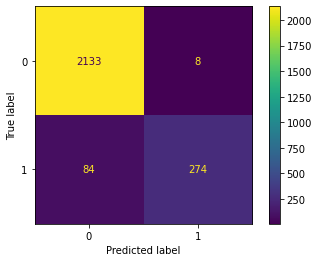

In [30]:
from sklearn.metrics import accuracy_score, plot_roc_curve, plot_confusion_matrix

plot_confusion_matrix(tree_clf,X_train,y_train)

In [31]:
print(accuracy_score(y_train, y_pred))
print(recall_score(y_train, y_pred))
print(precision_score(y_train, y_pred))

0.9631852741096438
0.7653631284916201
0.9716312056737588


In [32]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt_slow = GradientBoostingClassifier(max_depth=2,
                                      n_estimators=1000,
                                      learning_rate=0.1,
                                      random_state=42)
gbrt_slow.fit(X_train, y_train)
gbrt_slow.score(X_train,y_train), gbrt_slow.score(X_test,y_test) 

(0.9899959983993597, 0.947242206235012)

In [35]:
# import xgboost

# grad_boost_class = xgboost.XGBClassifier(random_state=42, objective='binary:logistic')

# grad_boost_class.fit(X_train, y_train)
# grad_boost_class.score(X_test, y_test)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score
import numpy as np

knn = KNeighborsClassifier(3)

knn.fit(X_train, y_train)

scores = cross_val_score(estimator=knn, X=X_train,
                y=y_train, cv=5)
np.median(scores)

0.852